In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np
import os

In [2]:
# resets the dictionaries
trials = {}
mets = {}

In [3]:
# # reads in motion data to dictionary
def mot_reader(trial):
    for files in os.walk('C:/Users/rosha/OneDrive/Documents/WEAV_joint/WEAV-Joint-Range-Of-Motion/OpenSimData/Kinematics'):
        for file in files[2]:
            if trial in file:
                name = file.replace('.mot', '')
                trials["{0}".format(name)] = pd.read_csv('C:/Users/rosha/OneDrive/Documents/WEAV_joint/WEAV-Joint-Range-Of-Motion/OpenSimData/Kinematics/{}'.format(file), skiprows = 10, sep = '\t')
                
mot_reader('s003')
mot_reader('s004')
mot_reader('s005')
mot_reader('s006')
mot_reader('s007')

In [4]:
trials

{'Down_10_s003_1':            time  pelvis_tilt  pelvis_list  pelvis_rotation  pelvis_tx  \
 0      0.000000    -5.357169     7.758560       182.987475   0.761464   
 1      0.016667    -5.971028     8.198111       182.311093   0.756941   
 2      0.033333    -2.926097     8.666676       182.851600   0.749994   
 3      0.050000    -0.789172     8.814039       183.069699   0.747963   
 4      0.066667     0.407425     8.863831       183.721236   0.750082   
 ...         ...          ...          ...              ...        ...   
 3594  59.900000    -0.668754     5.327867       184.997481   0.688337   
 3595  59.916667    -1.291352     6.570532       184.618282   0.682397   
 3596  59.933333    -1.928156     7.607825       184.121835   0.676395   
 3597  59.950000    -2.548602     8.430958       183.728844   0.671487   
 3598  59.966667    -2.830675     9.135949       183.405158   0.668025   
 
       pelvis_ty  pelvis_tz  hip_flexion_r  hip_adduction_r  hip_rotation_r  \
 0      1.038

In [80]:
# reads in trial data from dictionary
def mags(trial_name):
  trial = []
  for key in trials.keys():
    if trial_name in key:
      trial.append(trials[key])
  # calculates magnitude of lumbar for trial
  def lum_mag(trial):
    avg_mags = []
    avg_rhythms = []
    for sub in trial:
      peaks = find_peaks(sub['lumbar_rotation'], np.nanmean(sub['lumbar_rotation']), distance = 40)
      run = 0
      mag = []
      rhythm = []
      for pt in (peaks[0])[0:-1]:
        period_end = peaks[0].item(run + 1)
        period_start = peaks[0].item(run)
        rhythm.append(period_end - period_start)
        valley = min(((sub)['lumbar_rotation'])[period_start:period_end])
        peak = ((sub)['lumbar_rotation'][period_end])
        mag.append(peak - valley)
        run += 1
      avg_mags.append(sum(mag) / len(mag))
      avg_rhythms.append(sum(rhythm) / len(rhythm))
    trial_mag = sum(avg_mags) / len(avg_mags)
    ryvar = sum(avg_rhythms) / len(avg_rhythms)
    trial_rhythm = ryvar / 60
    results = [trial_mag, trial_rhythm]
    return results
  # calculates magnitude of right arm flex for trial
  def raf_mag(trial):
    avg_mags = []
    avg_rhythms = []
    for sub in trial:
      peaks = find_peaks(sub['arm_flex_r'], np.nanmean(sub['arm_flex_r']), distance = 40)
      run = 0
      mag = []
      rhythm = []
      for pt in (peaks[0])[0:-1]:
        period_end = peaks[0].item(run + 1)
        period_start = peaks[0].item(run)
        rhythm.append(period_end - period_start)
        valley = min(((sub)['arm_flex_r'])[period_start:period_end])
        peak = ((sub)['arm_flex_r'][period_end])
        mag.append(peak - valley)
        run += 1
      avg_mags.append(sum(mag) / len(mag))
      avg_rhythms.append(sum(rhythm) / len(rhythm))
    trial_mag = sum(avg_mags) / len(avg_mags)
    ryvar = sum(avg_rhythms) / len(avg_rhythms)
    trial_rhythm = ryvar / 60
    results = [trial_mag, trial_rhythm]
    return results
  # calculates magnitude of left arm flex for trial
  def laf_mag(trial):
    avg_mags = []
    avg_rhythms = []
    for sub in trial:
      peaks = find_peaks(sub['arm_flex_l'], np.nanmean(sub['arm_flex_l']), distance = 40)
      run = 0
      mag = []
      rhythm = []
      for pt in (peaks[0])[0:-1]:
        period_end = peaks[0].item(run + 1)
        period_start = peaks[0].item(run)
        rhythm.append(period_end - period_start)
        valley = min(((sub)['arm_flex_l'])[period_start:period_end])
        peak = ((sub)['arm_flex_l'][period_end])
        mag.append(peak - valley)
        run += 1
      avg_mags.append(sum(mag) / len(mag))
      avg_rhythms.append(sum(rhythm) / len(rhythm))
    trial_mag = sum(avg_mags) / len(avg_mags)
    ryvar = sum(avg_rhythms) / len(avg_rhythms)
    trial_rhythm = ryvar / 60
    results = [trial_mag, trial_rhythm]
    return results
  # calculates magnitude of right elbow flex for trial
  def ref_mag(trial):
    avg_mags = []
    avg_rhythms = []
    for sub in trial:
      peaks = find_peaks(sub['elbow_flex_r'], np.nanmean(sub['elbow_flex_r']), distance = 40)
      run = 0
      mag = []
      rhythm = []
      for pt in (peaks[0])[0:-1]:
        period_end = peaks[0].item(run + 1)
        period_start = peaks[0].item(run)
        rhythm.append(period_end - period_start)
        valley = min(((sub)['elbow_flex_r'])[period_start:period_end])
        peak = ((sub)['elbow_flex_r'][period_end])
        mag.append(peak - valley)
        run += 1
      avg_mags.append(sum(mag) / len(mag))
      avg_rhythms.append(sum(rhythm) / len(rhythm))
    trial_mag = sum(avg_mags) / len(avg_mags)
    ryvar = sum(avg_rhythms) / len(avg_rhythms)
    trial_rhythm = ryvar / 60
    results = [trial_mag, trial_rhythm]
    return results
  # calculates magnitude of left elbow flex for trial
  def lef_mag(trial):
    avg_mags = []
    avg_rhythms = []
    for sub in trial:
      peaks = find_peaks(sub['elbow_flex_l'], np.nanmean(sub['elbow_flex_l']), distance = 40)
      run = 0
      mag = []
      rhythm = []
      for pt in (peaks[0])[0:-1]:
        period_end = peaks[0].item(run + 1)
        period_start = peaks[0].item(run)
        rhythm.append(period_end - period_start)
        valley = min(((sub)['elbow_flex_l'])[period_start:period_end])
        peak = ((sub)['elbow_flex_l'][period_end])
        mag.append(peak - valley)
        run += 1
      avg_mags.append(sum(mag) / len(mag))
      avg_rhythms.append(sum(rhythm) / len(rhythm))
    trial_mag = sum(avg_mags) / len(avg_mags)
    ryvar = sum(avg_rhythms) / len(avg_rhythms)
    trial_rhythm = ryvar / 60
    results = [trial_mag, trial_rhythm]
    return results
  final_trial_mags = {
      "Lumbar": (lum_mag(trial)),
      "Right Arm": (raf_mag(trial)),
      "Left Arm": (laf_mag(trial)),
      "Right Elbow": (ref_mag(trial)),
      "Left Elbow": (lef_mag(trial))
  }
  return final_trial_mags

mag_vals = {}

def mag_dict(trial):
  mag_vals['flat_10_{}'.format(trial)] = mags('Flat_10_{}'.format(trial))
  mag_vals['up_10_{}'.format(trial)] = mags('Up_10_{}'.format(trial))
  mag_vals['down_10_{}'.format(trial)] = mags('Down_10_{}'.format(trial))
  mag_vals['flat_08_{}'.format(trial)] = mags('Flat_08_{}'.format(trial))
  mag_vals['flat_12_{}'.format(trial)] = mags('Flat_12_{}'.format(trial))

mag_dict('s003')
mag_dict('s004')
mag_dict('s005')
mag_dict('s006')
mag_dict('s007')

<AxesSubplot: xlabel='Left Arm', ylabel='Right Arm'>

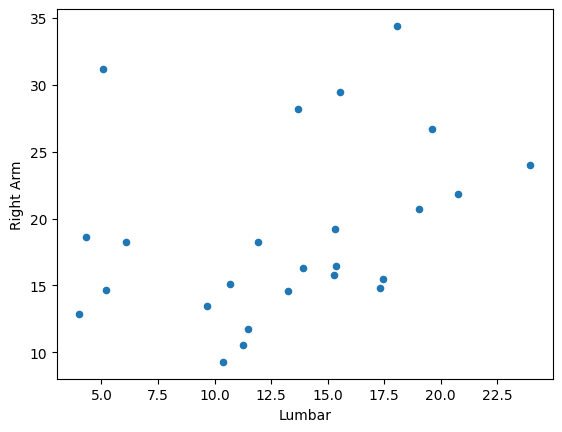

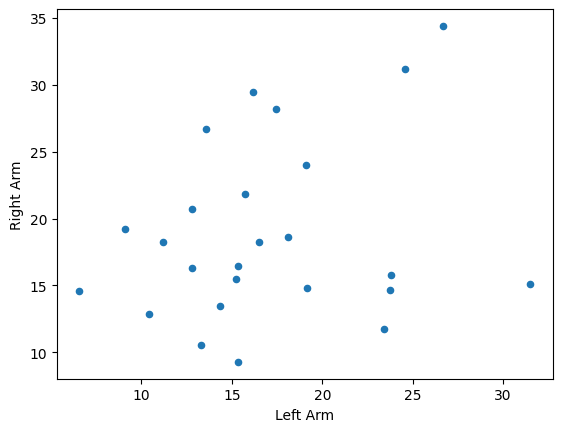

In [81]:
# create dataframe of ROM
ROM = pd.DataFrame(columns=['Subj','Trial','Met','Lumbar','Right Arm','Left Arm','Right Elbow','Left Elbow'])
for k in mag_df.keys():
    ks = k.split('_')
    ROM.loc[len(ROM)] = [ks[2], ks[0]+'_'+ks[1], 'MET', mag_df[k]['Lumbar'][0], mag_df[k]['Right Arm'][0],
                        mag_df[k]['Left Arm'][0],mag_df[k]['Right Elbow'][0], mag_df[k]['Left Elbow'][0]]

len(ROM)



ROM.plot.scatter(x='Lumbar', y='Right Arm')
ROM.plot.scatter(x='Left Arm', y='Right Arm')

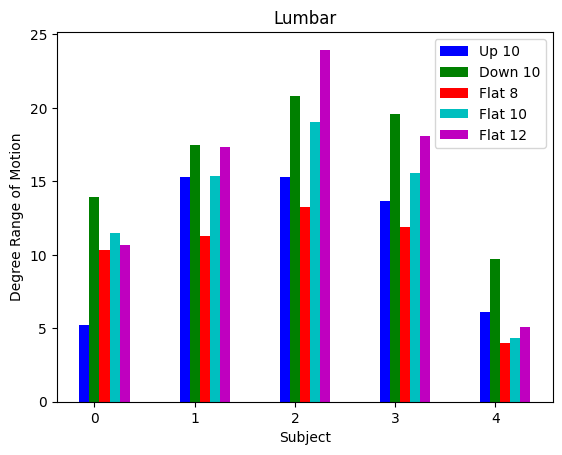

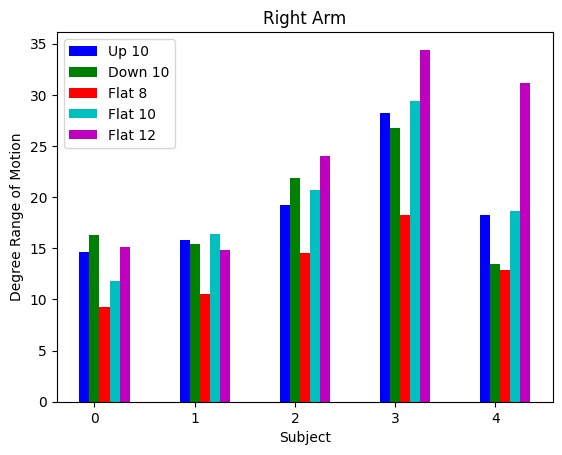

In [79]:
# random list grabbed to get list of joints
joints = list(mag_vals['flat_12_s006'].keys())

# function that plots all trials of a given subject
def subject_plotter(trial):
  for key in mag_vals.keys():
    if trial in key:
      mags = []
      for item in range(5):
        mags.append(list(mag_vals[key].values())[item][0])
      plt.bar(joints, mags)
      plt.xlabel('Joints')
      plt.ylabel('Degree Range of Motion')
      plt.title(key)
      plt.show()

# function that plots all trials of a given joint
def joint_plotter(joint):
  up_mags = []
  down_mags = []
  flat_08_mags = []
  flat_10_mags = []
  flat_12_mags = []
  for key in mag_vals.keys():
    if 'up' in key:
      up_mags.append(list(mag_vals[key].values())[joint][0])
    if 'down' in key:
      down_mags.append(list(mag_vals[key].values())[joint][0])
    if 'flat_08' in key:
      flat_08_mags.append(list(mag_vals[key].values())[joint][0])
    if 'flat_10' in key:
      flat_10_mags.append(list(mag_vals[key].values())[joint][0])
    if 'flat_12' in key:
      flat_12_mags.append(list(mag_vals[key].values())[joint][0])

  ax = plt.subplot(111)

  w = 0.1
  x = np.arange(len(up_mags))
  ax.bar(x - w, up_mags, width = w, color = 'b', align = 'center')
  ax.bar(x, down_mags, width = w, color = 'g', align = 'center')
  ax.bar(x + w, flat_08_mags, width = w, color = 'r', align = 'center')
  ax.bar(x + 2 * w, flat_10_mags, width = w, color = 'c', align = 'center')
  ax.bar(x + 3 * w, flat_12_mags, width = w, color = 'm', align = 'center')
  ax.legend(('Up 10', 'Down 10', 'Flat 8', 'Flat 10', 'Flat 12'))

  plt.xlabel('Subject')
  plt.ylabel('Degree Range of Motion')
  plt.title(joints[joint])
  plt.show()
joint_plotter(0)
joint_plotter(1)

In [ ]:
def read_met(trial):
    for files in os.walk('C:/Users/rosha/OneDrive/Documents/WEAV_joint/WEAV-Joint-Range-Of-Motion/OpenSimData/Metabolics'):
        for file in files[2]:
            if trial in file:
                name = file.replace('.csv', '')
                mets["{0}".format(name)] = pd.read_csv('C:/Users/rosha/OneDrive/Documents/WEAV_joint/WEAV-Joint-Range-Of-Motion/OpenSimData/Metabolics/{}'.format(file))

read_met('s003')
read_met('s004')
read_met('s005')
read_met('s006')

In [ ]:
print(mets['cpet_s005'])

             ID1 Unnamed: 1  Unnamed: 2          Test date 11/14/2022  \
0      Last Name          5         NaN          Test Time    2:54 PM   
1     First Name       WEAV         NaN      Test Duration      37:51   
2         Gender     Female         NaN  Exercise Duration      00:00   
3            Age         22         NaN       Subject Type    Healthy   
4    Height (cm)        151         NaN          Test Type     Submax   
..           ...        ...         ...                ...        ...   
843          NaN        NaN         NaN                NaN        NaN   
844          NaN        NaN         NaN                NaN        NaN   
845          NaN        NaN         NaN                NaN        NaN   
846          NaN        NaN         NaN                NaN        NaN   
847          NaN        NaN         NaN                NaN        NaN   

     Unnamed: 5       Barometric Pressure (mmHg)    759  Unnamed: 8      t  \
0           NaN         Ambient Temperature (